In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1: Data Set Reading and Studying

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Step 2 : Data Set Cleaning and Analysis

In [3]:
#Data Cleaning
#checking for the presence of any null values in the iris dataset
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
#checking the datatypes of columns of the dataset:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
#to list all the unique values in each column:
for i in iris.columns:
    print(f"{i}: \n {iris[i].unique()}")

sepal_length: 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal_width: 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal_length: 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal_width: 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
species: 
 ['setosa' 'versicolor' 'virginica']


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
import warnings
warnings.filterwarnings("ignore")

#### Step 3 : Data Visualization / Exploratory Data Analysis (EDA)

In [8]:
count = iris["species"].value_counts()   #counts the different types of species it has in the dataset
count

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
# Plotting the columns through heatmap which is a 2D color-coded matrix that allows relationships or patterns between two variables.
#Heatmap is mainly used to show correlation between features and visualize confusion matrices.
#This mainly works on numerical data columns
columns = ["sepal_length","sepal_width","petal_length","petal_width"]
iris[columns].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

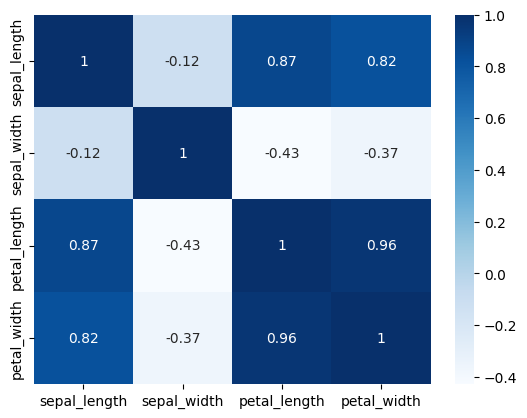

In [10]:
sns.heatmap(data = iris[columns].corr(),annot = True, cmap = "Blues")
#annot helps to labels the boxes

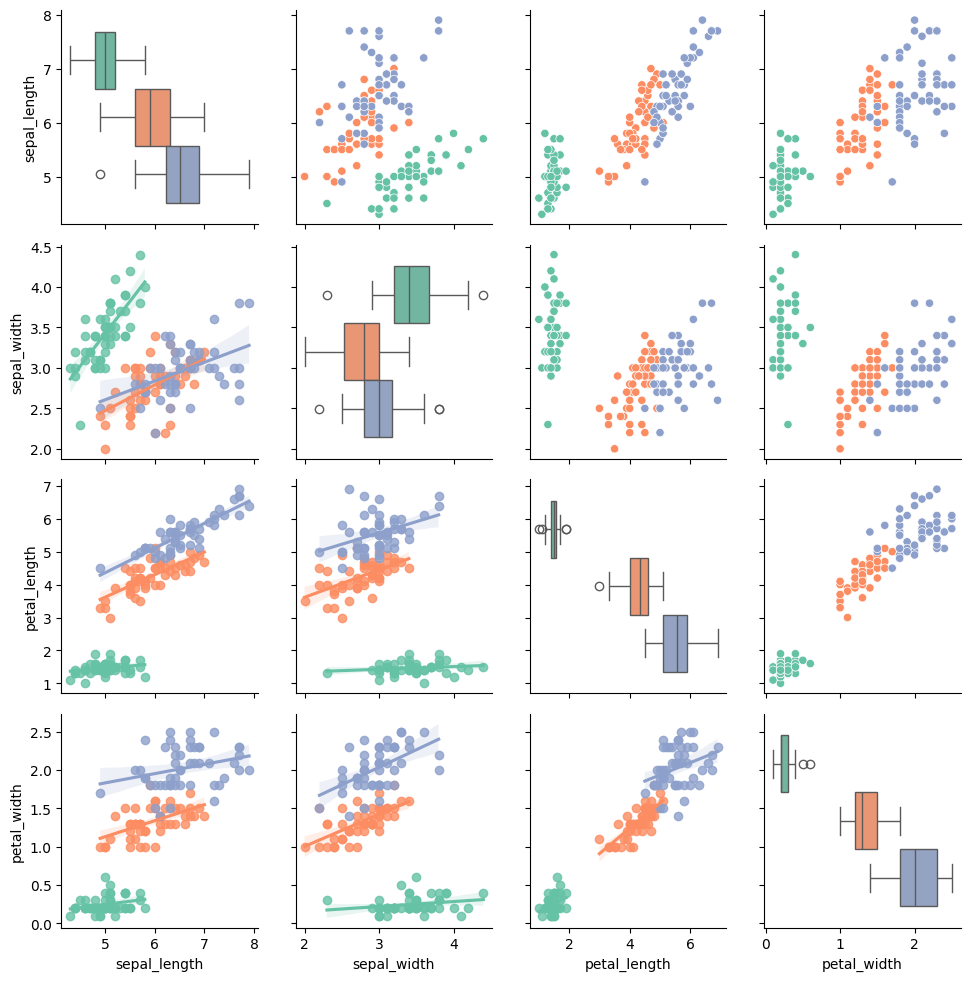

In [11]:
#Pair grid for plotting pairwise relationships in a dataset
graph = sns.PairGrid(data = iris, hue = "species", palette = "Set2")
graph.map_upper(sns.scatterplot)  #upper graph
graph.map_lower(sns.regplot)     #lower graph
graph.map_diag(sns.boxplot)   #diagonal graph

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

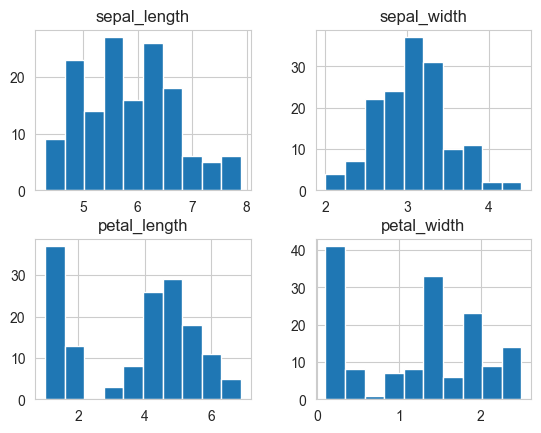

In [12]:
sns.set_style("whitegrid")
iris.hist()

([<matplotlib.patches.Wedge at 0x17ad5ba57f0>,
 [Text(0.5999999697158604, 1.039230502025882, 'setosa'),
  Text(-1.0999999999999959, -9.616505800409723e-08, 'versicolor'),
  Text(0.5500003659264656, -0.9526277328950455, 'virginica')],
 [Text(0.3499999823342519, 0.6062177928484311, '33.3'),
  Text(-0.5999999999999978, -5.2453668002234845e-08, '33.3'),
  Text(0.3000001995962539, -0.5196151270336611, '33.3')])

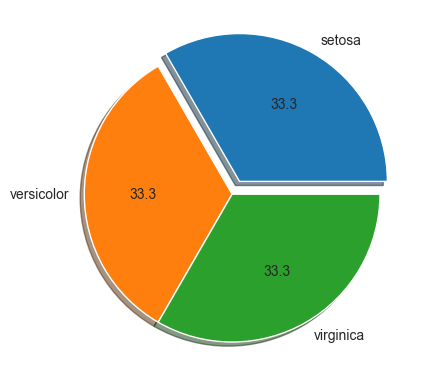

In [13]:
plt.pie(count,labels = count.index, autopct = "%1.1f", shadow =True, explode = [0.1,0,0])

#### Step 4 : Encoding

In [14]:
#Label Encoding -> providing unique integer values based on alphabetical order
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
#changing species column:
iris.species = le.fit_transform(iris.species)
iris.species.unique()

array([0, 1, 2])

In [16]:
le.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Step 5 : IP/OP Creation

In [17]:
ip = iris.drop("species", axis = 1)
ip.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
op = iris.species
op

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

#### Step 6 : Train Test Split:

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ip,op, test_size = 0.2)

In [20]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [21]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
121,5.6,2.8,4.9,2.0
43,5.0,3.5,1.6,0.6
127,6.1,3.0,4.9,1.8
62,6.0,2.2,4.0,1.0
6,4.6,3.4,1.4,0.3


In [22]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
67,5.8,2.7,4.1,1.0
111,6.4,2.7,5.3,1.9
146,6.3,2.5,5.0,1.9
102,7.1,3.0,5.9,2.1
37,4.9,3.6,1.4,0.1


In [23]:
ytrain.head()

121    2
43     0
127    2
62     1
6      0
Name: species, dtype: int64

In [24]:
ytest.head()

67     1
111    2
146    2
102    2
37     0
Name: species, dtype: int64

#### Step 7 : Standardization : to bring all the ip to a ranges of -inf to +inf

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
#fit_transform
xtrain = sc.fit_transform(xtrain)
xtrain

array([[-0.24490525, -0.59447112,  0.70067165,  1.11674667],
       [-0.95306501,  0.96601557, -1.15528804, -0.72260079],
       [ 0.34522788, -0.14861778,  0.70067165,  0.85398275],
       [ 0.22720126, -1.93203114,  0.19450083, -0.19707294],
       [-1.42517152,  0.7430889 , -1.26777044, -1.11674667],
       [ 0.58128114, -1.70910447,  0.41946564,  0.19707294],
       [-0.12687862,  2.97235561, -1.21152924, -0.98536471],
       [ 0.69930777, -0.37154445,  0.36322443,  0.19707294],
       [-0.36293188, -1.04032446,  0.41946564,  0.06569098],
       [-0.48095851,  0.7430889 , -1.21152924, -0.98536471],
       [-1.18911827, -0.14861778, -1.26777044, -1.3795106 ],
       [ 0.81733439, -0.14861778,  0.86939526,  1.11674667],
       [-0.48095851, -0.14861778,  0.47570684,  0.45983687],
       [-1.18911827,  0.7430889 , -1.15528804, -1.24812863],
       [ 0.22720126, -0.81739779,  0.81315406,  0.59121883],
       [-0.008852  , -0.81739779,  0.13825962,  0.06569098],
       [ 0.34522788, -0.

In [27]:
#transform
xtest = sc.transform(xtest)

In [28]:
xtest

array([[-0.008852  , -0.81739779,  0.25074203, -0.19707294],
       [ 0.69930777, -0.81739779,  0.92563646,  0.98536471],
       [ 0.58128114, -1.26325113,  0.75691285,  0.98536471],
       [ 1.52549416, -0.14861778,  1.26308368,  1.24812863],
       [-1.07109164,  1.18894224, -1.26777044, -1.3795106 ],
       [ 0.81733439, -0.14861778,  1.20684247,  1.3795106 ],
       [ 0.34522788, -0.14861778,  0.53194804,  0.3284549 ],
       [-1.18911827,  0.07430889, -1.15528804, -1.24812863],
       [ 0.10917463, -0.14861778,  0.30698323,  0.45983687],
       [-0.71701176, -0.81739779,  0.13825962,  0.3284549 ],
       [ 1.05338765, -1.26325113,  1.20684247,  0.85398275],
       [ 1.05338765,  0.07430889,  0.58818924,  0.45983687],
       [ 2.23365392, -0.14861778,  1.37556608,  1.51089256],
       [-0.83503839,  1.63479558, -1.21152924, -1.11674667],
       [ 0.58128114,  0.52016223,  1.31932488,  1.77365648],
       [-0.24490525, -0.81739779,  0.30698323,  0.19707294],
       [ 0.34522788, -0.

#### Step 8 : Applying ML algorithm

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Step 9 :Testing the data

In [31]:
pred = lr.predict(xtest)
pred

array([ 0.98230431,  1.70420223,  1.63514632,  1.87611811, -0.10079844,
        1.98869168,  1.29125458,  0.01831651,  1.26395436,  1.22750079,
        1.74307987,  1.28602864,  1.95092026,  0.00573473,  2.23436036,
        1.19855232,  1.21060193,  1.06091269,  1.99557221,  1.54354082,
       -0.16214003,  0.07119363,  1.57377595, -0.06407879,  1.73606629,
        1.73606629,  1.9785533 ,  0.09815469,  1.55579965,  1.03565674])

In [32]:
ytest

67     1
111    2
146    2
102    2
37     0
104    2
91     1
30     0
61     1
59     1
108    2
86     1
135    2
19     0
100    2
94     1
73     1
92     1
105    2
126    2
36     0
5      0
138    2
27     0
142    2
101    2
148    2
26     0
123    2
64     1
Name: species, dtype: int64

#### MSE (Mean Squared Error) : to help find error

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,pred)
mse

0.05064454715177477

#### R2 Score : to find accuracy

In [50]:
from sklearn.metrics import r2_score
mse = r2_score(ytest,pred)
mse

0.9215488942571475

#### Plotting Best Fit Line

In [51]:
df = pd.DataFrame({'Ytest' : list(ytest), 'Prediction' : pred})
df.head()

,Ytest,Prediction
0,1,0.982304
1,2,1.704202
2,2,1.635146
3,2,1.876118
4,0,-0.100798


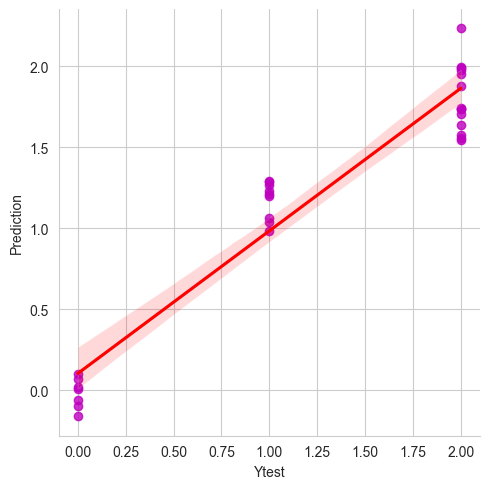

In [52]:
sns.lmplot(x = 'Ytest', y = 'Prediction', data = df, scatter_kws = {'color' : 'm'}, line_kws = {'color' : 'r'})
plt.show()

In [53]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [54]:
#testing:
ypred1 = knn.predict(xtest)
ypred1

array([1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 0, 1, 1])

#### Step 10 : Checking Model's Performance

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acc1 = accuracy_score(ytest, ypred1)
rec1 = recall_score(ytest, ypred1, average='weighted')
pre1 = precision_score(ytest, ypred1, average='weighted')
f11 = f1_score(ytest, ypred1, average='weighted')

print("Accuracy:", acc1)
print("Recall(weighted):", rec1)
print("Precision(weighted):", pre1)
print("F1 Score(weighted):", f11)

Accuracy: 0.9333333333333333
Recall(weighted): 0.9333333333333333
Precision(weighted): 0.9454545454545454
F1 Score(weighted): 0.9341025641025641


In [60]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred1)
cm

array([[ 7,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]])

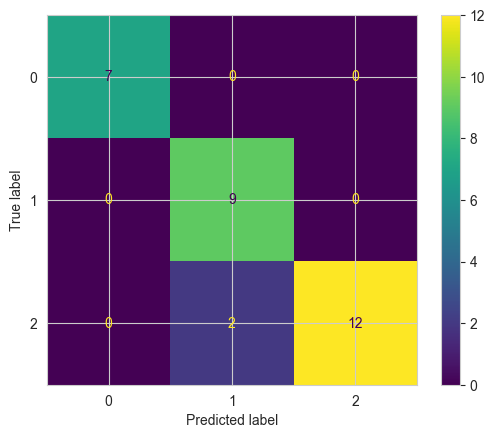

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()